## PINNs - Physical informed neural networks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
# Calor 1D:

def heat_equation1D(dif, plate_length, nx,
                    initial_cond, cc_left, cc_right,
                    nt=100):

  dx  = plate_length/nx
  dx2 = dx**2

  xi  = np.linspace(0,plate_length, nx)

  dt = dx2/(4*dif)
  ti  = np.arange(0,nt,dt)

  assert dt <= dx2/(4*dif), 'stability criteria not achieved'

  u = np.zeros((len(ti), nx))
  #condição inicial
  u[0,:] = initial_cond
  #condição de contorno
  u[:,0]  = cc_left
  u[:,nx-1] = cc_right

  constante = dt*dif/(dx2)

  for k in tqdm(range(0,len(ti)-1)):
    for i in range(1,nx-1):
      u[k+1,i] = u[k,i] + constante*(u[k,i+1] - 2*u[k,i] + u[k,i-1])

  return ti, xi,u

  0%|          | 0/4999 [00:00<?, ?it/s]

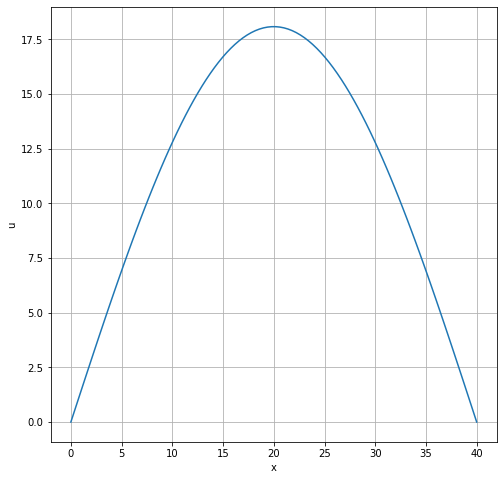

In [4]:
tt, xx, sol = heat_equation1D(2,40,100,50,0,0)

plt.figure(1, figsize=(8,8))
plt.plot(xx,sol[-1,:])
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.show()

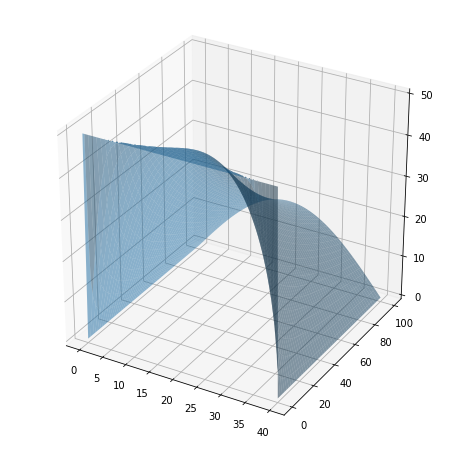

In [5]:
X, Y = np.meshgrid(xx, tt)

plt.figure(2, figsize=(8,8))
ax1 = plt.axes(projection="3d")
ax1.plot_surface(X, Y, sol,
                alpha=0.5)
plt.show()

In [60]:
# solucao analitica:
from scipy.integrate import quad
import sympy as sp  

x = sp.symbols('x')                                
n = sp.symbols('n', real=True, nonzero=True)       
L = 40
D = 2
f_init = 50
cn_integrate  = f_init*sp.sin((n*sp.pi*x)/L)
result_cn_int = sp.integrate(cn_integrate, (x, 0, L))   
cn = sp.lambdify(n, (2/L)*(result_cn_int))
cn(1)

63.66197723675813

In [65]:
def u_analitica(n,x,pos_t):

    final_sol = []

    for j in range(len(x)):
        soma = 0
        for i in range(n):
            soma = soma + cn(i+1)*np.exp(-(((i+1)**2)*(np.pi**2)*D*tt[pos_t])/L)*np.sin(((i+1)*np.pi*x[j])/L)
        
        final_sol.append(soma)
    return final_sol

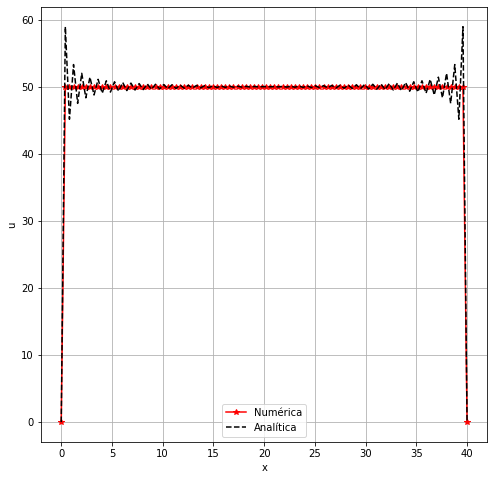

In [90]:
tempo  = 0
res = u_analitica(100, xx, tempo)

plt.figure(3, figsize=(8,8))
plt.plot(xx,sol[tempo,:], '*-r', label = 'Numérica')
plt.plot(xx,res, '--k', label = 'Analítica')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid()
plt.show()